Анализ данных Titanic

Подготовка данных 

In [ ]:
import pandas as pd

In [57]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [58]:
df = pd.concat([train_df, test_df], ignore_index=True)

In [59]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')

Анализ Таблицы

In [60]:
print(df.describe())

       PassengerId          Age        SibSp        Parch         Fare
count  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000
mean    655.000000    29.881138     0.498854     0.385027    33.295479
std     378.020061    14.413493     1.041658     0.865560    51.758668
min       1.000000     0.170000     0.000000     0.000000     0.000000
25%     328.000000    21.000000     0.000000     0.000000     7.895800
50%     655.000000    28.000000     0.000000     0.000000    14.454200
75%     982.000000    39.000000     1.000000     0.000000    31.275000
max    1309.000000    80.000000     8.000000     9.000000   512.329200


In [61]:
most_passengers_class = df['Pclass'].value_counts().idxmax()
print(f"Больше всего пассажиров было в классе: {most_passengers_class}")

Больше всего пассажиров было в классе: 3


In [62]:
grouped_df = df.groupby(['Pclass', 'Sex'])['Age'].mean()
print(grouped_df)

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64


C:\Users\kirya\AppData\Local\Temp\ipykernel_23088\2665393010.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['Pclass', 'Sex'])['Age'].mean()


In [69]:
youngest = grouped_df.idxmin()
oldest = grouped_df.idxmax()
age_difference = grouped_df.max() - grouped_df.min()

print(f"Самый юный: {youngest}, средний возраст: {grouped_df.min():.2f}")
print(f"Самый взрослый: {oldest}, средний возраст: {grouped_df.max():.2f}")
print(f"Разница в возрасте: {age_difference:.2f}")

Самый юный: (np.int64(3), 'female'), средний возраст: 22.19
Самый взрослый: (np.int64(1), 'male'), средний возраст: 41.03
Разница в возрасте: 18.84


In [70]:
survivors_k = df[df['Survived'] == 1][df['Name'].str.startswith('K')].sort_values(by='Fare', ascending=False)
print(survivors_k)

     PassengerId Survived Pclass                                      Name  \
621          622      1.0      1              Kimball, Mr. Edwin Nelson Jr   
457          458      1.0      1         Kenyon, Mrs. Frederick R (Marion)   
316          317      1.0      2       Kantor, Mrs. Sinai (Miriam Sternin)   
184          185      1.0      3       Kink-Heilmann, Miss. Luise Gretchen   
706          707      1.0      2             Kelly, Mrs. Florence "Fannie"   
691          692      1.0      3                        Karun, Miss. Manca   
303          304      1.0      2                       Keane, Miss. Nora A   
300          301      1.0      3  Kelly, Miss. Anna Katherine "Annie Kate"   
573          574      1.0      3                         Kelly, Miss. Mary   

        Sex   Age  SibSp  Parch  Ticket     Fare Cabin Embarked  
621    male  42.0      1      0   11753  52.5542   D19        S  
457  female   NaN      1      0   17464  51.8625   D21        S  
316  female  24.0    

C:\Users\kirya\AppData\Local\Temp\ipykernel_23088\3308503538.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivors_k = df[df['Survived'] == 1][df['Name'].str.startswith('K')].sort_values(by='Fare', ascending=False)


In [71]:
max_relatives = df['SibSp'].max() + df['Parch'].max()
print(f"Максимальное количество родных: {max_relatives}")

Максимальное количество родных: 17


In [73]:
mean_fare_cabin = df[df['Cabin'].notna()]['Fare'].mean()
mean_fare_no_cabin = df[df['Cabin'].isna()]['Fare'].mean()
fare_ratio = mean_fare_cabin / mean_fare_no_cabin
print(f"Средняя стоимость билета с указанной каютой: {mean_fare_cabin:.1f}")
print(f"Средняя стоимость билета без указанной каюты: {mean_fare_no_cabin:.1f}")
print(f"Отношение стоимости билетов: {fare_ratio:.1f}")

Средняя стоимость билета с указанной каютой: 81.9
Средняя стоимость билета без указанной каюты: 19.1
Отношение стоимости билетов: 4.3


Визуализация 

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

Scatter plot

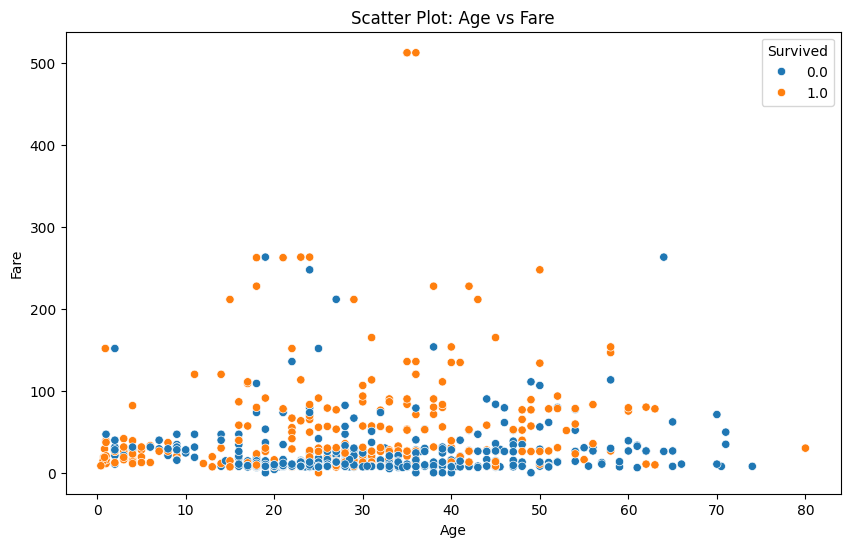

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Scatter Plot: Age vs Fare")
plt.show()

Linear plot (with several lines)

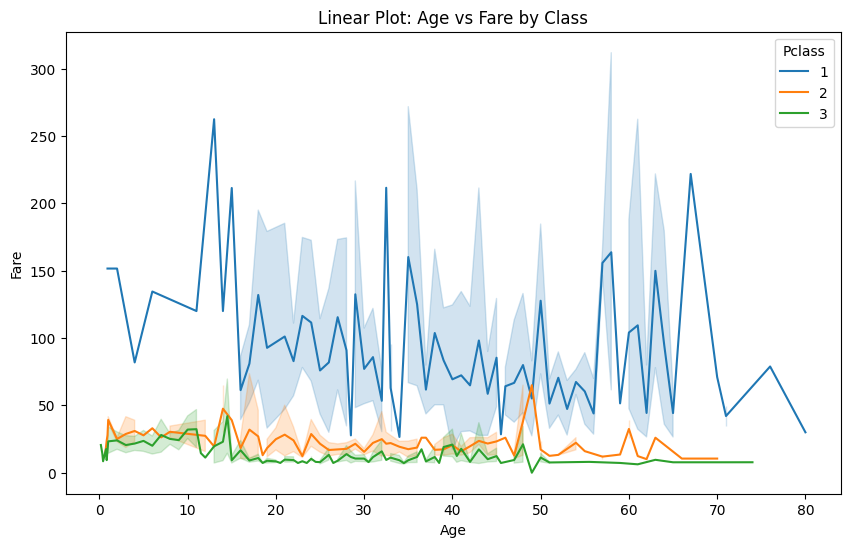

In [76]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Fare', hue='Pclass', data=df)
plt.title("Linear Plot: Age vs Fare by Class")
plt.show()

Histogram

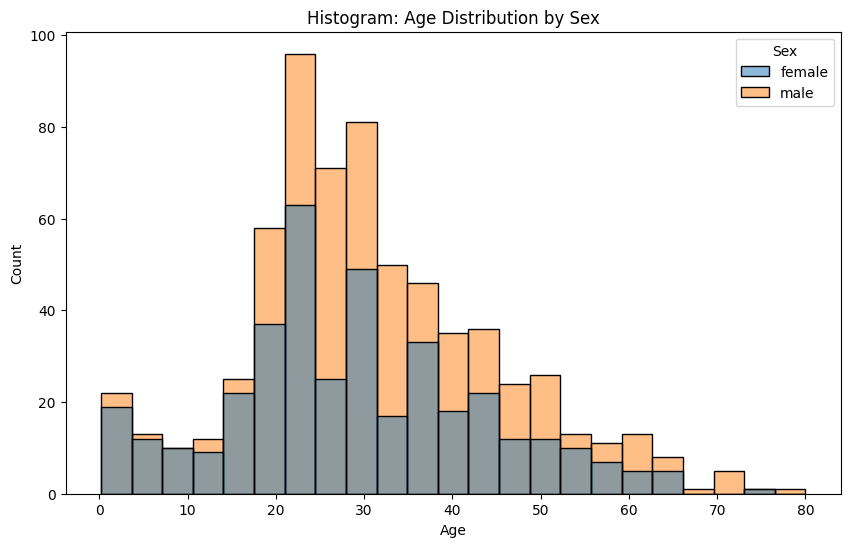

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Sex', data=df)
plt.title("Histogram: Age Distribution by Sex")
plt.show()

Bar chart

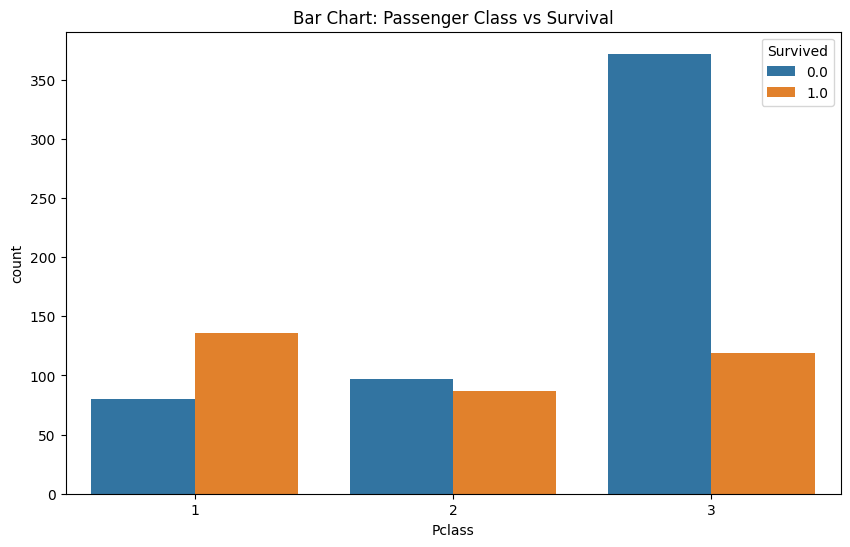

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Bar Chart: Passenger Class vs Survival")
plt.show()

Horizontal bar chart

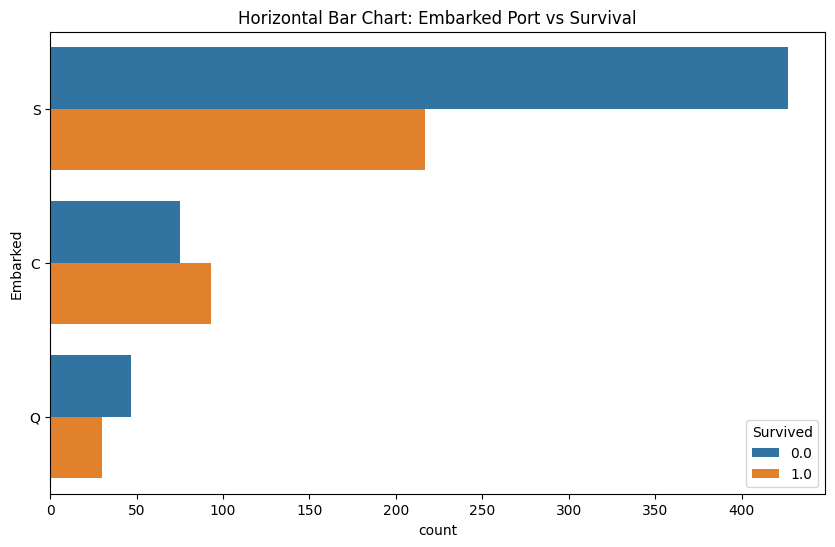

In [79]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Embarked', hue='Survived', data=df)
plt.title("Horizontal Bar Chart: Embarked Port vs Survival")
plt.show()

Pie chart

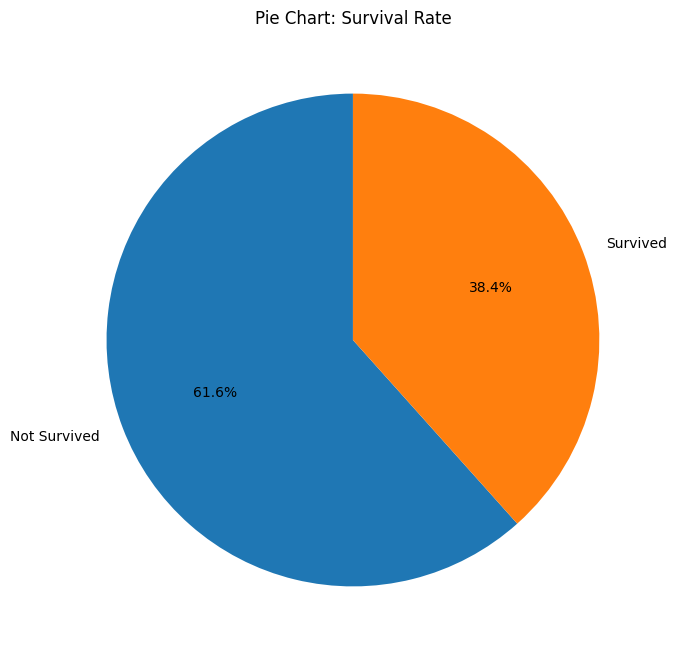

In [80]:
plt.figure(figsize=(8, 8))
plt.pie(df['Survived'].value_counts(), labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart: Survival Rate")
plt.show()

Box chart

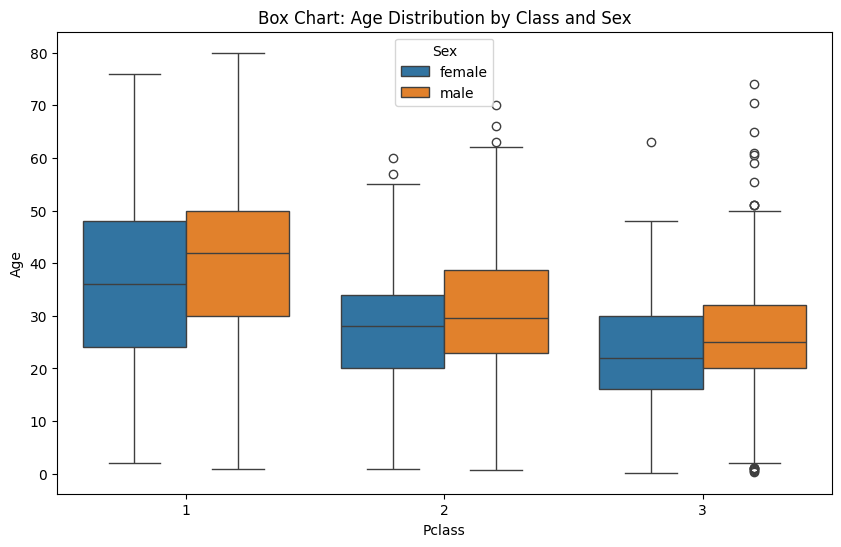

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df)
plt.title("Box Chart: Age Distribution by Class and Sex")
plt.show()

Sunburst chart

In [ ]:
import plotly.express as px
df_no_nan = df.dropna(subset=['Pclass', 'Sex', 'Embarked', 'Survived'])  

fig = px.sunburst(df_no_nan, path=['Pclass', 'Sex', 'Embarked', 'Survived'], values='Fare',
                 title='Sunburst: Fare by Pclass, Sex, Embarked, and Survival')

fig.show()

d:\python_test\spbu-python-course\venv\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfg = df.groupby(path[i:]).agg(agg_f)
d:\python_test\spbu-python-course\venv\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfg = df.groupby(path[i:]).agg(agg_f)
d:\python_test\spbu-python-course\venv\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

3D Scatter plot

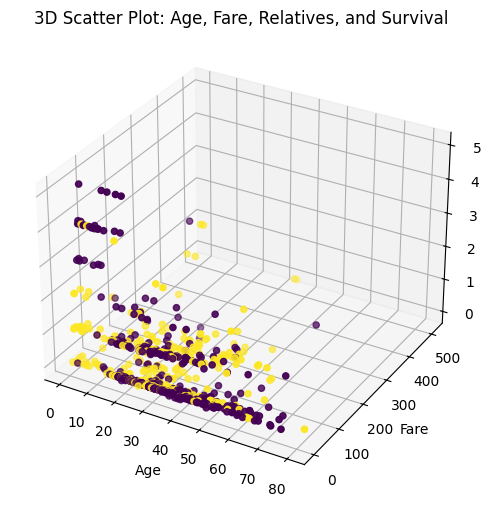

In [88]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Fare'], df['SibSp'], c=df['Survived'], cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Relatives')
plt.title("3D Scatter Plot: Age, Fare, Relatives, and Survival")
plt.show()

Sankey Diagram 

In [ ]:
import plotly.graph_objects as go


df_no_nan = df.dropna(subset=['Pclass', 'Survived'])  # Удаляем строки с NaN

source = df_no_nan['Pclass'].map({1: 0, 2: 1, 3: 2}).tolist()
target = df_no_nan['Survived'].map({0: 3, 1: 4}).tolist()
node_labels = ['Pclass 1', 'Pclass 2', 'Pclass 3', 'Died', 'Survived']

fig = go.Figure(data=[go.Sankey(
    node=dict(label=node_labels,
              pad=15,
              thickness=20,
              line=dict(color="black", width=0.5)),
    link=dict(source=source, target=target, value=[1] * len(df_no_nan),
             color=[str(i/len(node_labels)) for i in range(len(node_labels))]))])

fig.update_layout(title_text='Sankey Diagram: Passenger Class to Survival',
                  font_size=10)
fig.show()


ValueError: 
    Invalid element(s) received for the 'color' property of sankey.link
        Invalid elements include: ['0.0', '0.2', '0.4', '0.6', '0.8']

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A list or array of any of the above